<a href="https://colab.research.google.com/github/yubisushi/-/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

1 . Image 샘플 시각화

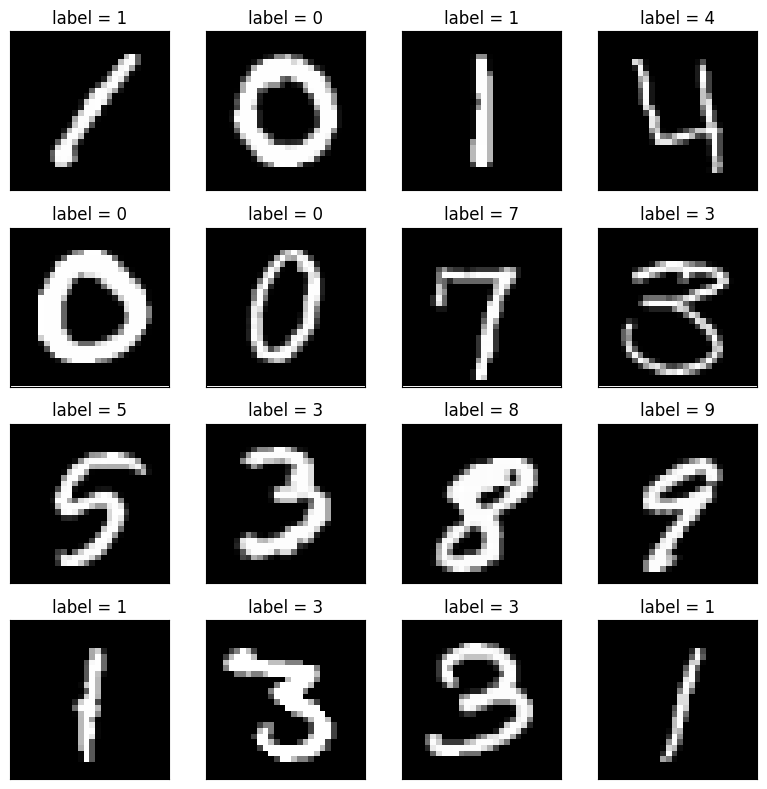

In [10]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

y = train['label'].values
X = train.drop('label', axis=1).values
X_test = test.values

def plot_sample_grid(X, y):
    fig, ax = plt.subplots(4, 4, figsize=(8, 8))
    for i in range(4):
        for j in range(4):
            idx = i * 4 + j
            ax[i, j].imshow(X[idx].reshape(28, 28), cmap='gray')
            ax[i, j].set_title('label = %s' % y[idx])
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
    plt.tight_layout()
    plt.show()

plot_sample_grid(X, y)


2 . Scikit-learn을 이용해서 모델을 학습

In [12]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)
clf = LogisticRegression(
    C=1.0,
    class_weight=None,
    dual=False,
    fit_intercept=True,
    intercept_scaling=1,
    l1_ratio=None,
    max_iter=100,
    multi_class='multinomial',
    n_jobs=None,
    penalty='l2',
    random_state=None,
    solver='lbfgs',
    tol=0.001,
    verbose=0,
    warm_start=False
)
clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', tol=0.001)

3. 검증(Validation)데이터(x_val)를 prediction 하고 정확도를 평가

In [13]:
y_val_pred = clf.predict(X_val)
print("Model accuracy is %0.3f" % (accuracy_score(y_val, y_val_pred)))

Model accuracy is 0.918


4. 옳게 분류한 이미지를 아래 format에 맞게 시각화

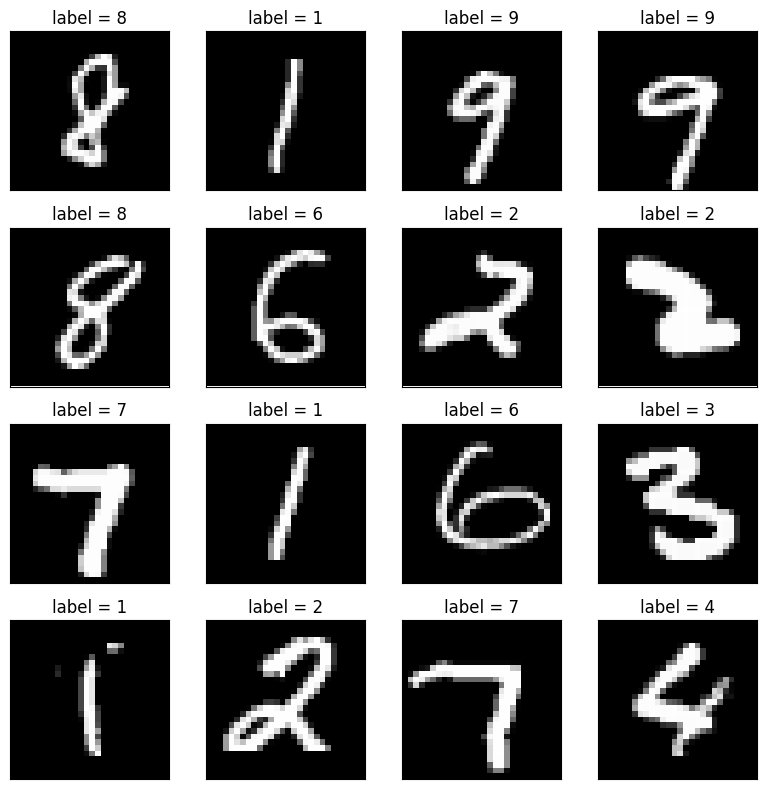

In [14]:
correct_indices = np.where(y_val == y_val_pred)[0]
x_val_correct = X_val[correct_indices]
y_val_correct = y_val[correct_indices]
y_val_pred_correct = y_val_pred[correct_indices]

fig, ax = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        idx = i * 4 + j
        ax[i, j].imshow(x_val_correct[idx].reshape(28, 28), cmap='gray')
        ax[i, j].set_title("label = %s" % y_val_correct[idx])
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
plt.tight_layout()
plt.show()


5 . 잘못 분류한 이미지를 아래 format에 맞게 시각화

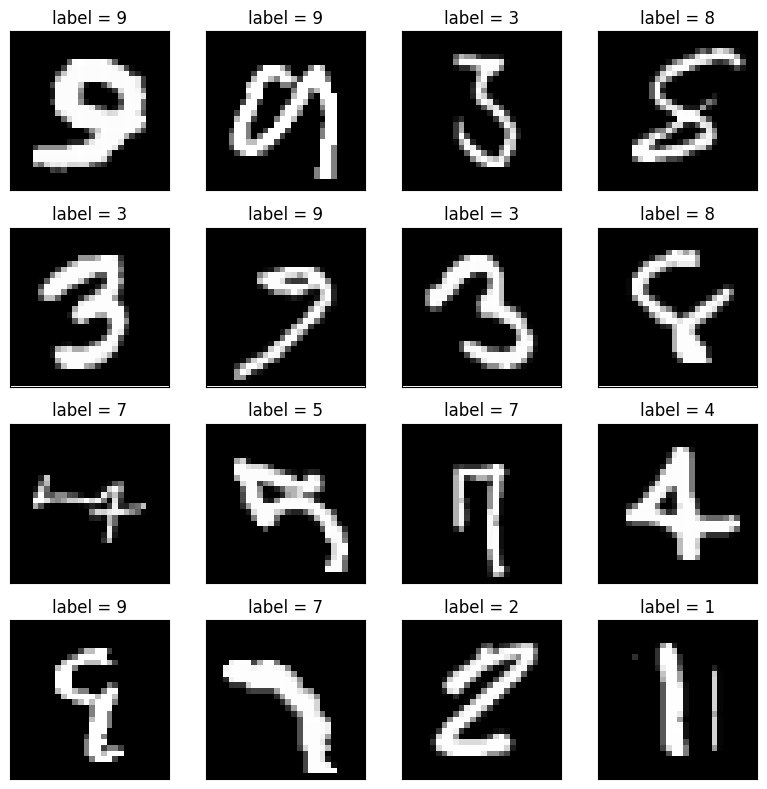

In [19]:
incorrect_indices = np.where(y_val != y_val_pred)[0]
x_val_incorrect = X_val[incorrect_indices]
y_val_incorrect = y_val[incorrect_indices]
y_val_pred_incorrect = y_val_pred[incorrect_indices]

fig, ax = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        idx = i * 4 + j
        ax[i, j].imshow(x_val_incorrect[idx].reshape(28, 28), cmap='gray')
        ax[i, j].set_title("label = %s" % y_val_incorrect[idx])  # Fixed the syntax error here
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
plt.tight_layout()
plt.show()

 6 . 테스트 데이터(x_test)를 사용해서 예측하기

In [20]:
test_pred = clf.predict(X_test)

7. 예측값을 파일(sample_submission.csv)로 내보내기

In [21]:
submission = pd.DataFrame({
    'ImageId': np.arange(1, len(test_pred) + 1),
    'Label': test_pred
})
submission.to_csv('/content/sample_submission.csv', index=False)